# Riskfolio-Lib Tutorial: 
<br><a href="https://www.kqzyfj.com/click-101360347-15150084?url=https%3A%2F%2Flink.springer.com%2Fbook%2F9783031843037" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button.png" height="40" />
</div>
<br>
</a>
<a href="https://www.paypal.com/ncp/payment/GN55W4UQ7VAMN" target="_blank">
<div>
<img src="https://raw.githubusercontent.com/dcajasn/Riskfolio-Lib/refs/heads/master/docs/source/_static/Button2.png" height="40" />
</div>
</a>

<br><a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 
<br>
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.linkedin.com/company/orenj-i)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__

## Tutorial 51: Classic Mean Variance Optimization with Risk Factor Contribution Inequalities Constraints

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Tickers of factors
factors = ['MTUM', 'QUAL', 'SIZE', 'USMV', 'VLUE']
factors.sort()

# All Tickers
tickers = assets + factors
tickers.sort()

# Downloading data
prices = yf.download(tickers, start = start, end = end, auto_adjust=False)
prices = prices.loc[:,('Adj Close', slice(None))]
prices.columns = tickers

# Calculating returns of Assets and Factors
returns = prices[tickers].pct_change().dropna()

# Separate Exogenous and Endogenous Variables
F = returns[factors]
Y = returns[assets]

[*********************100%***********************]  30 of 30 completed


In [2]:
# Calculating returns

display(Y.head())
display(F.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4036%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1954%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1729%,0.2409%,1.3734%,-1.0857%
2016-01-06,-11.4864%,-1.5879%,0.2412%,-1.7557%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5647%,0.3107%,-1.0155%,-0.7653%,-3.0048%,-0.9034%,-2.9145%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-2.7699%,-1.1047%,-1.9769%,-1.2206%,-0.8856%,-4.6058%,-2.5394%,...,-2.2066%,-3.0310%,-1.0410%,-3.1557%,-1.6148%,-0.2699%,-2.2845%,-2.0570%,-0.5492%,-3.0019%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5706%,-1.6402%,-1.7642%,-0.1649%,...,-0.1539%,-1.1366%,-0.7307%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1386%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,0.1692%,-1.6851%,-1.0215%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1451%,1.2225%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2016-01-05,0.4735%,0.2672%,0.0000%,0.6779%,0.1635%
2016-01-06,-0.5267%,-1.1914%,-0.5380%,-0.6253%,-1.8277%
2016-01-07,-2.2293%,-2.3798%,-1.7181%,-1.6215%,-2.1609%
2016-01-08,-0.9549%,-1.1376%,-1.1978%,-1.0086%,-1.0873%
2016-01-11,0.6043%,0.1479%,-0.5898%,0.1491%,-0.6183%


## 2. Estimating Mean Variance Portfolios

### 2.1 Calculating the portfolio that maximizes Sharpe ratio.

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1589%,11.5019%,0.0000%,0.0000%,8.4806%,0.0000%,3.8194%,0.0000%,0.0000%,...,10.8264%,0.0000%,0.0000%,0.0000%,0.0000%,7.1804%,0.0000%,0.0000%,4.2739%,0.0000%


### 2.2 Plotting portfolio composition

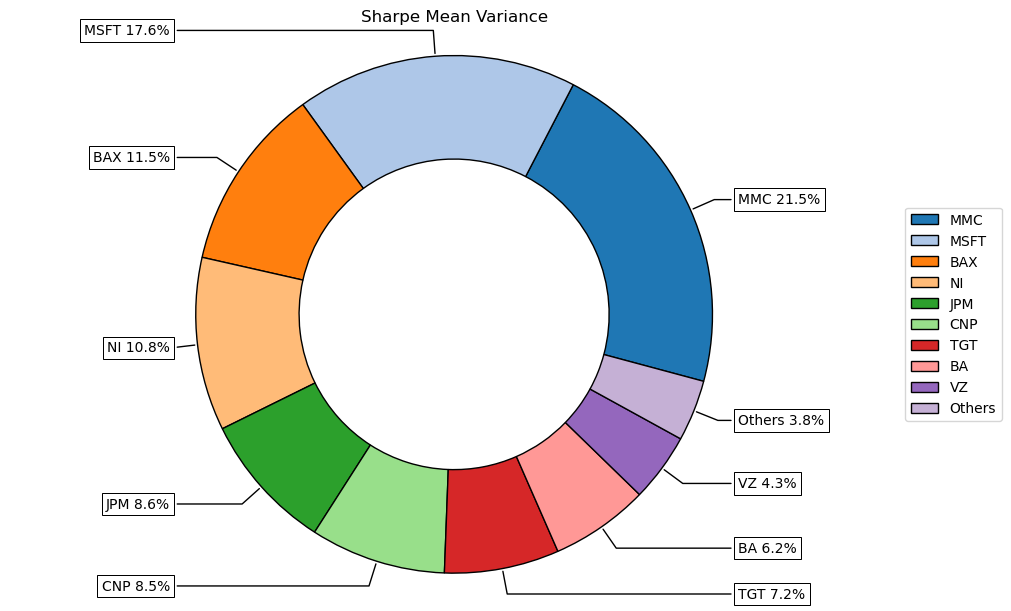

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(
    w=w,
    title='Sharpe Mean Variance',
    others=0.05,
    nrow=25,
    cmap="tab20",
    height=6,
    width=10,
    ax=None)

### 2.3 Plotting factor risk contribution

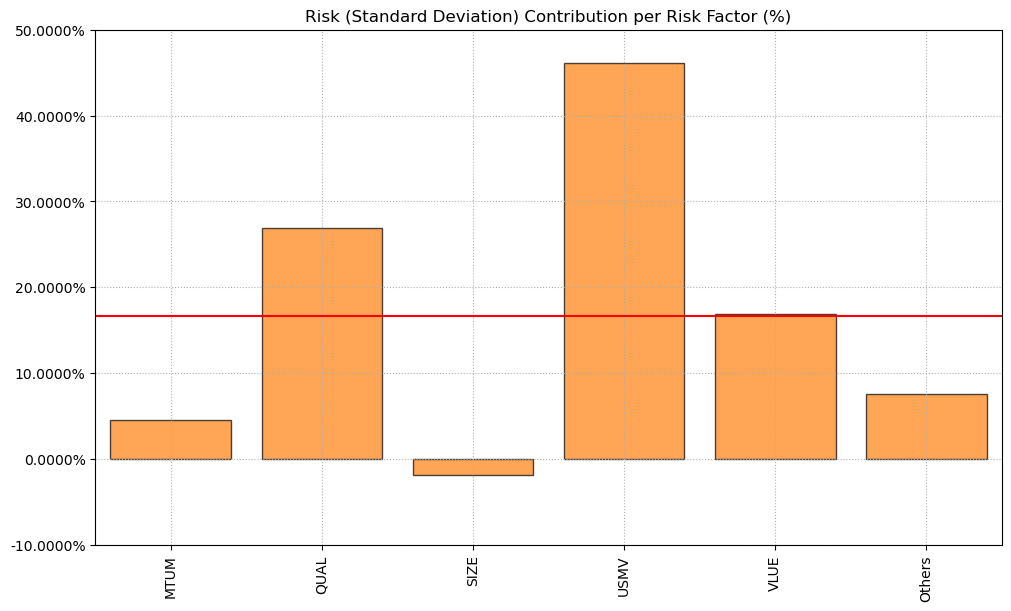

In [5]:
# Plotting the risk composition of the portfolio

ax = rp.plot_factor_risk_con(w,
    cov=Y.cov(),
    returns=Y,
    factors=F,
    rm='MV',
    rf=0,
    alpha=0.05,
    feature_selection='stepwise',
    stepwise='Forward',
    percentage=True,
    t_factor=1,
    ax=None)

## 3. Constraints on Assets and Assets Classes

### 3.1 Creating the constraints

In this part I use dictionaries to create the constraints but is prefered to create the tables in excel and upload them with pandas.read_excel.

In [6]:
asset_classes = {'Assets': ['MTUM', 'QUAL', 'SIZE', 'USMV', 'VLUE']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = {'Disabled': [False],
               'Type': ['All Assets'],
               'Set': [''],
               'Position': [''],
               'Sign': ['<='],
               'Weight': [0.30],
               'Type Relative': [''],
               'Relative Set': [''],
               'Relative': [''],
               'Factor': ['']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,30.0000%,,,,


In [7]:
A, B = rp.assets_constraints(constraints, asset_classes)

### 3.2 Optimize the portfolio with the linear constraints

In [8]:
# Calculate factor stats (include loadings matrix)
port.factors = F
port.factors_stats(method_mu=method_mu, method_cov=method_cov)

# Create the matrices of the factor risk contribution constraints
port.afrcinequality = A
port.bfrcinequality = B

# Optimizing considering the factor risk contribution constraints
# This model does not work for high levels of risk, so if you use
# obj MaxRet or Utility, you must consider a lower level of risk 
# constraint or a high risk aversion parameter
model = 'Classic'
obj = 'Sharpe'
kelly = None
rf = 0
l = 2

w = port.frc_optimization(model=model, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.1274%,6.9546%,4.6979%,5.3965%,2.7251%,2.5375%,4.5057%,4.5808%,3.5730%,...,3.4270%,2.9625%,3.7215%,3.2769%,1.7481%,2.7681%,7.8460%,4.2029%,2.0605%,1.0682%


### 3.3 Plotting portfolio composition

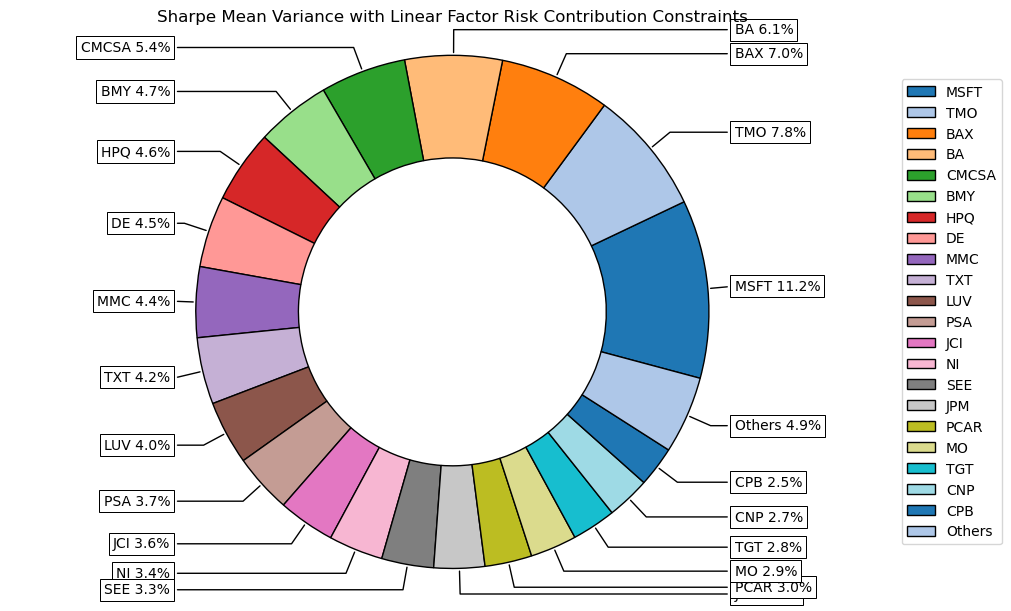

In [9]:
ax = rp.plot_pie(
    w=w,
    title='Sharpe Mean Variance with Linear Factor Risk Contribution Constraints',
    others=0.05,
    nrow=25,
    cmap="tab20",
    height=6,
    width=10,
    ax=None)

### 3.4 Plotting portfolio composition per class

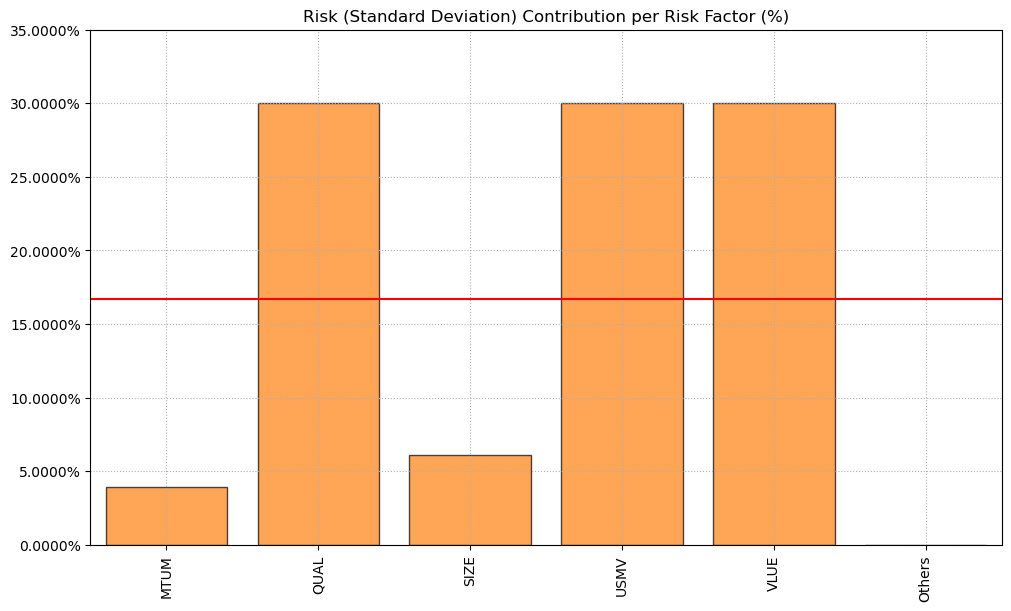

In [10]:
# Plotting the factor risk composition of the portfolio

ax = rp.plot_factor_risk_con(w,
    cov=Y.cov(),
    returns=Y,
    factors=F,
    rm='MV',
    rf=0,
    alpha=0.05,
    feature_selection='stepwise',
    stepwise='Forward',
    percentage=True,
    t_factor=1,
    ax=None)